In [1]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import scipy.stats as stats
import statistics

import matplotlib.pyplot as plt 
import seaborn as sns

import wrangle as wr
import explore as ex

np.random.seed(4)

from sklearn.cluster import KMeans

---

#### Moving on from the wrangle.jpynb I'll take a look at each distribution 

In [2]:
zillow = wr.acquire()
zillow = wr.get_single_unit_homes(zillow)
zillow = wr.handle_missing_values(zillow)

In [3]:
zillow.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
4,1970746,10887214,3.0,3.0,3.0,1312.0,1312.0,6037.0,3.0,34185120.0,...,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Condominium


In [4]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71687 entries, 0 to 77379
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            71687 non-null  int64  
 1   parcelid                      71687 non-null  int64  
 2   bathroomcnt                   71687 non-null  float64
 3   bedroomcnt                    71687 non-null  float64
 4   calculatedbathnbr             71472 non-null  float64
 5   calculatedfinishedsquarefeet  71538 non-null  float64
 6   finishedsquarefeet12          71359 non-null  float64
 7   fips                          71687 non-null  float64
 8   fullbathcnt                   71472 non-null  float64
 9   latitude                      71687 non-null  float64
 10  longitude                     71687 non-null  float64
 11  lotsizesquarefeet             63578 non-null  float64
 12  propertycountylandusecode     71687 non-null  object 
 13  p

<Figure size 720x576 with 0 Axes>

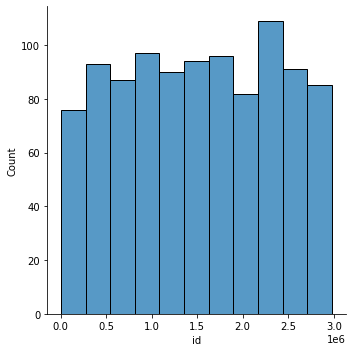

<Figure size 720x576 with 0 Axes>

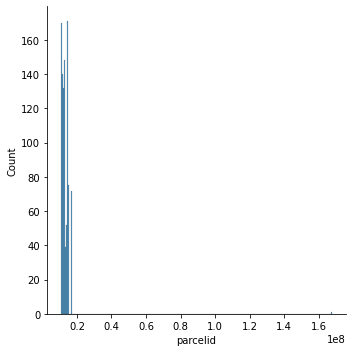

<Figure size 720x576 with 0 Axes>

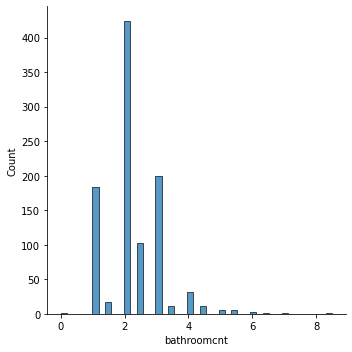

<Figure size 720x576 with 0 Axes>

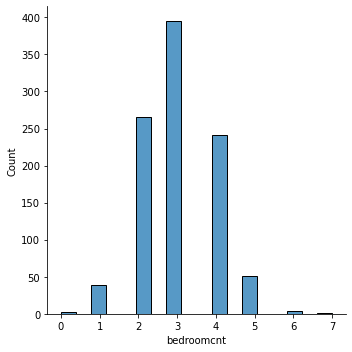

<Figure size 720x576 with 0 Axes>

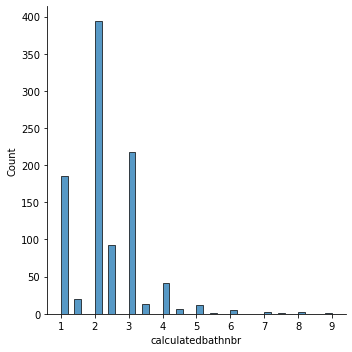

<Figure size 720x576 with 0 Axes>

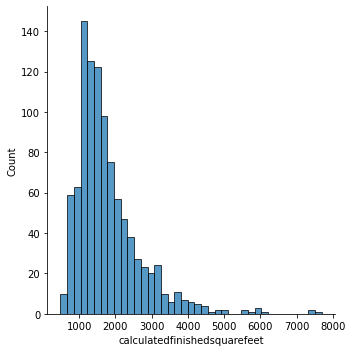

<Figure size 720x576 with 0 Axes>

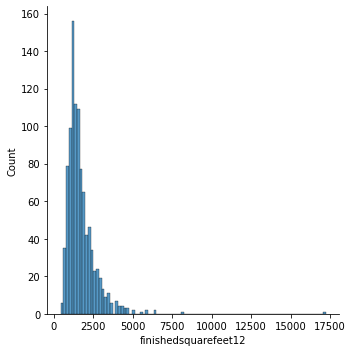

<Figure size 720x576 with 0 Axes>

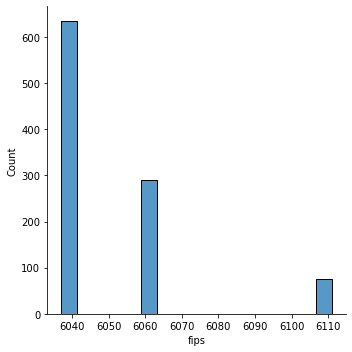

<Figure size 720x576 with 0 Axes>

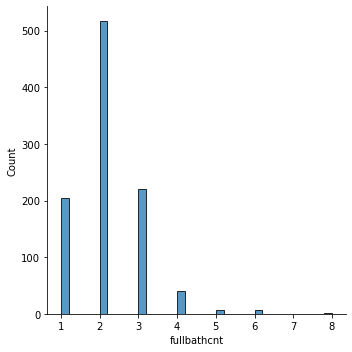

<Figure size 720x576 with 0 Axes>

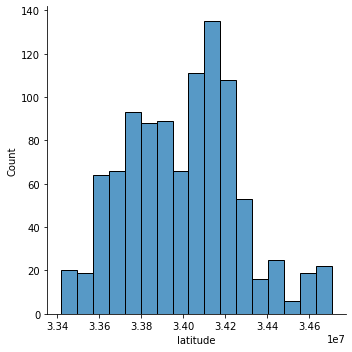

<Figure size 720x576 with 0 Axes>

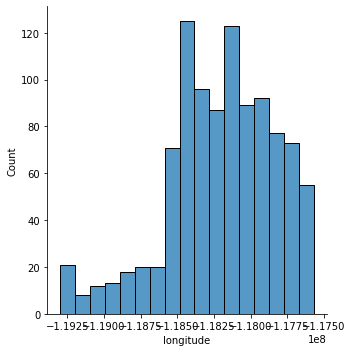

<Figure size 720x576 with 0 Axes>

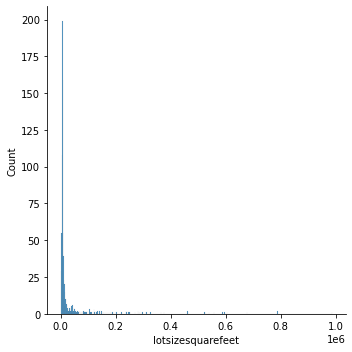

<Figure size 720x576 with 0 Axes>

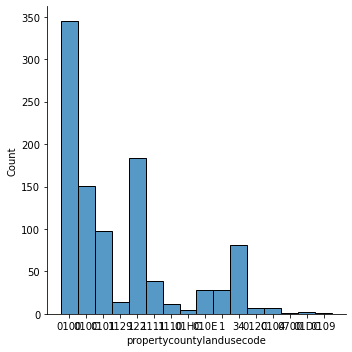

<Figure size 720x576 with 0 Axes>

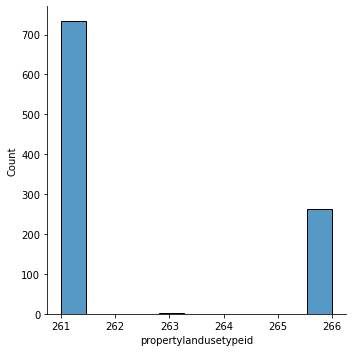

<Figure size 720x576 with 0 Axes>

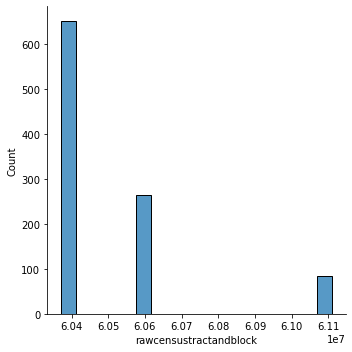

<Figure size 720x576 with 0 Axes>

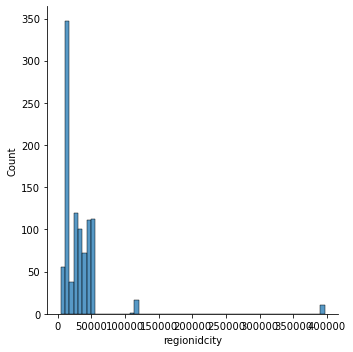

<Figure size 720x576 with 0 Axes>

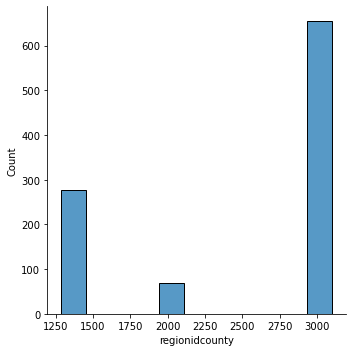

<Figure size 720x576 with 0 Axes>

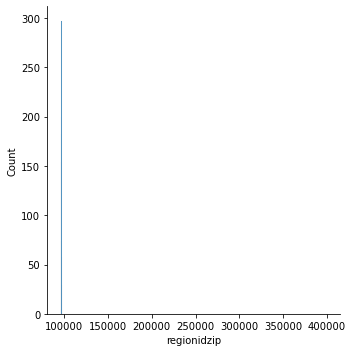

<Figure size 720x576 with 0 Axes>

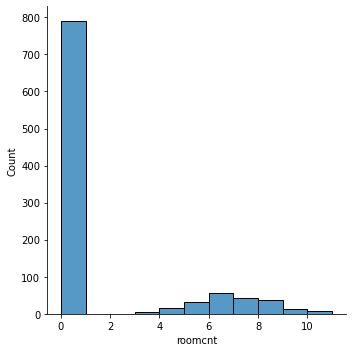

<Figure size 720x576 with 0 Axes>

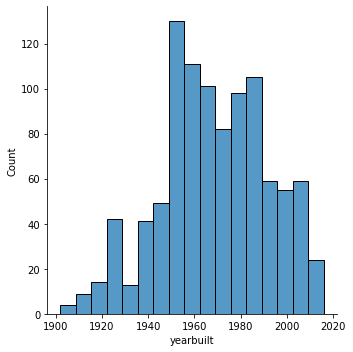

<Figure size 720x576 with 0 Axes>

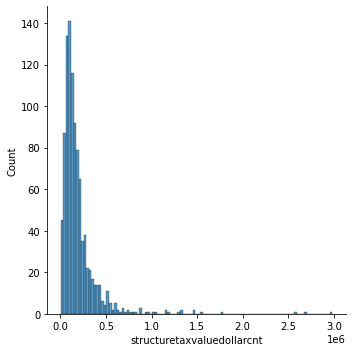

<Figure size 720x576 with 0 Axes>

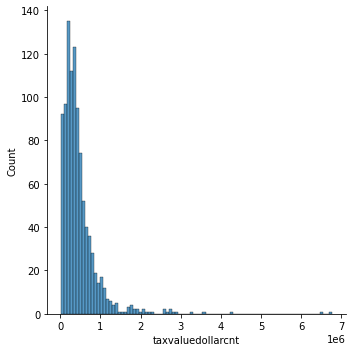

<Figure size 720x576 with 0 Axes>

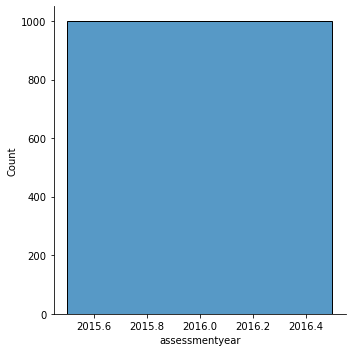

<Figure size 720x576 with 0 Axes>

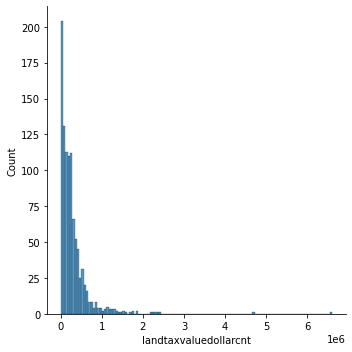

<Figure size 720x576 with 0 Axes>

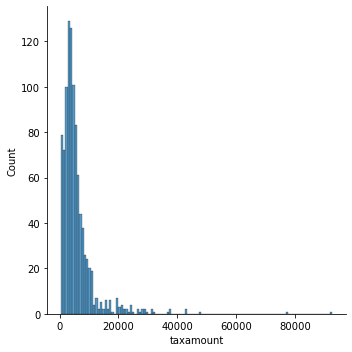

<Figure size 720x576 with 0 Axes>

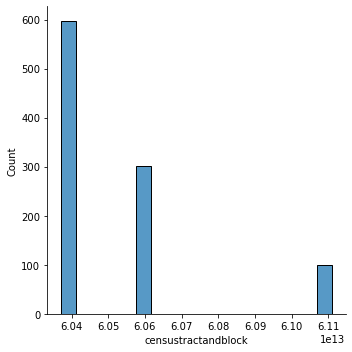

<Figure size 720x576 with 0 Axes>

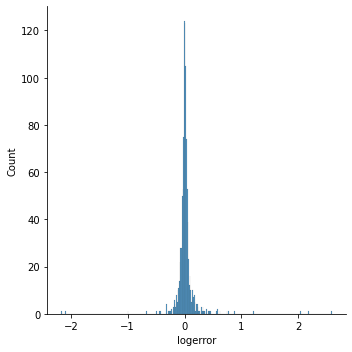

<Figure size 720x576 with 0 Axes>

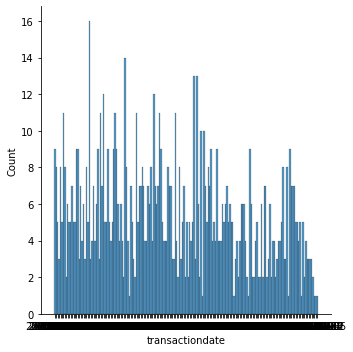

<Figure size 720x576 with 0 Axes>

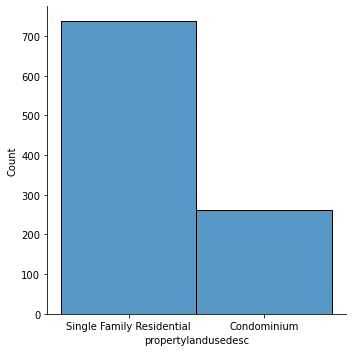

In [5]:
ex.df_distribution(zillow)

### Now that I've seen the distribution of the dataset, I will begin an indepth exploration 

# Acquire Data:

There seems to be a few outliers, so I'll check the dataframe with outliers removed with a standard 'omit outliers' function created from the previous zillow observation.

### Questions :
- Is log error significantly different per number of bathrooms?
- Is log error significantly different per number of bedrooms?
- Is log error significantly different per average sqaure feet in LA vs Orange vs Ventura? 
- Is log error significantly different per age of a home? 
- Is log error significantly different depending on the type of property. 

To answer these questions, I will make a dataframe from train that only contains the neccessary columns.

In [6]:
train, validate, test = ex.split_data()

In [23]:
train.shape, validate.shape, test.shape

((37403, 10), (15919, 10), (13312, 10))

In [7]:
# post-tidy
train.head()

,parcelid,logerror,bathrooms,bedrooms,square_feet,county,year_built,property_type,home_value
35021,12456239,0.110467,1.0,1,480,Los Angeles,1942,Single Family Residential,45881
5579,12864000,0.000151,4.0,5,2828,Los Angeles,1962,Single Family Residential,148451
71705,14733743,0.054847,2.5,2,1150,Orange,1998,Condominium,311854
57277,17075614,0.092856,3.0,3,2046,Ventura,1990,Single Family Residential,796305
45925,11177880,-0.041157,2.0,2,1028,Los Angeles,1985,Single Family Residential,270563


---

### Distribution of dataframe with:
- nulls
- fewer outliers
- cleaner data

<Figure size 720x576 with 0 Axes>

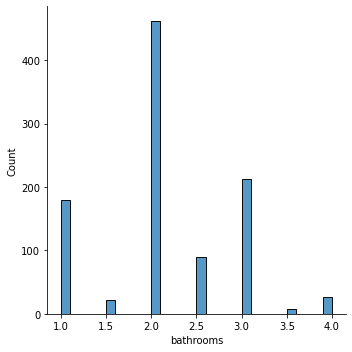

<Figure size 720x576 with 0 Axes>

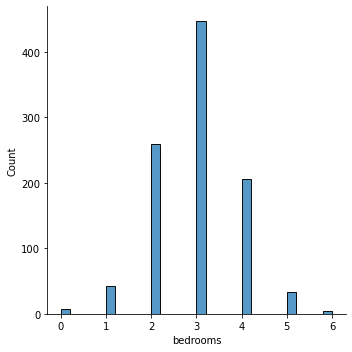

<Figure size 720x576 with 0 Axes>

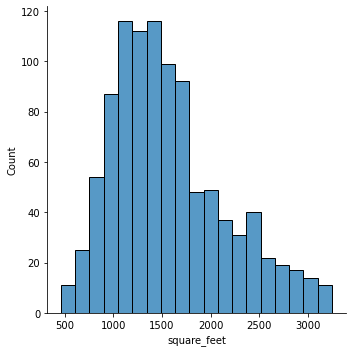

<Figure size 720x576 with 0 Axes>

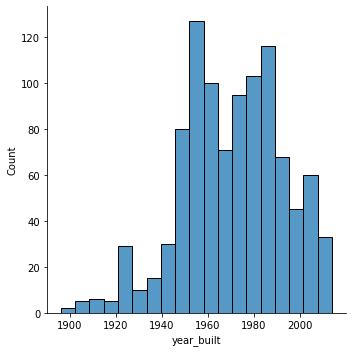

<Figure size 720x576 with 0 Axes>

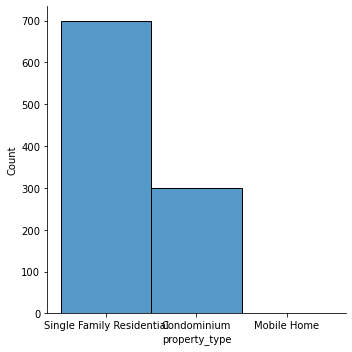

<Figure size 720x576 with 0 Axes>

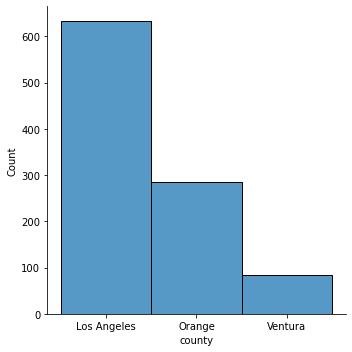

<Figure size 720x576 with 0 Axes>

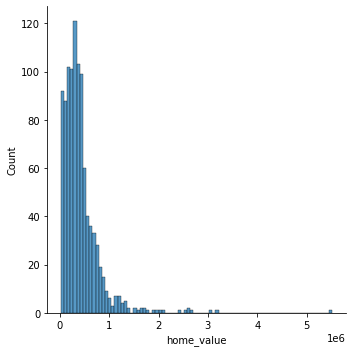

In [8]:
ex.train_data_distribution(train)

---

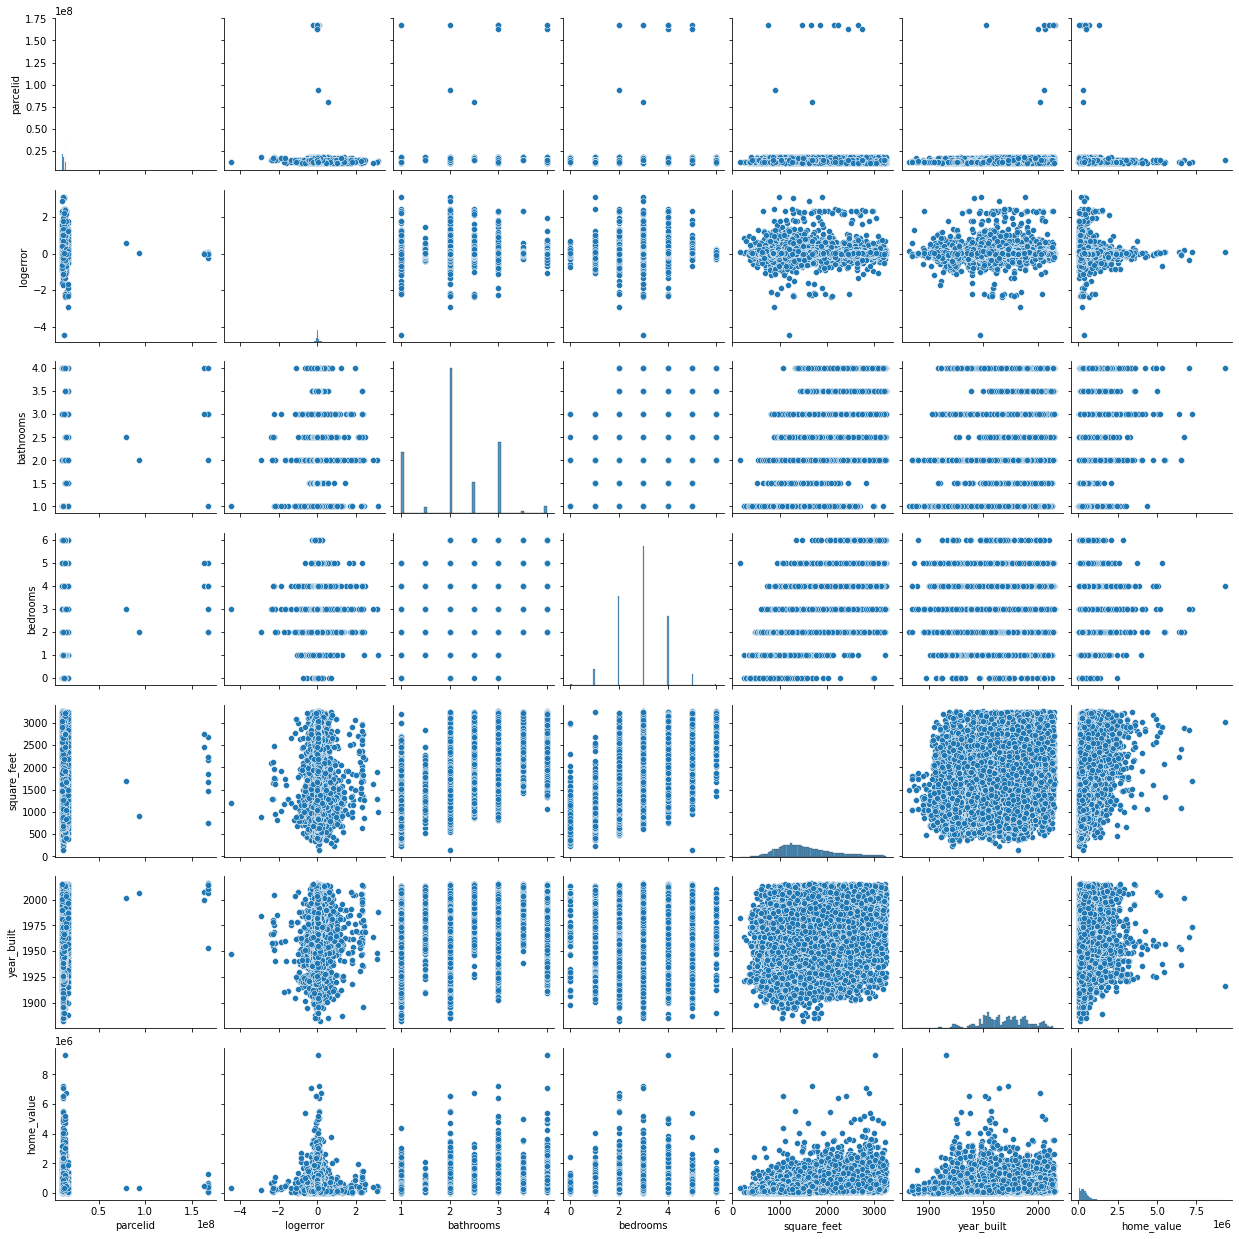

In [9]:
sns.pairplot(data=train)

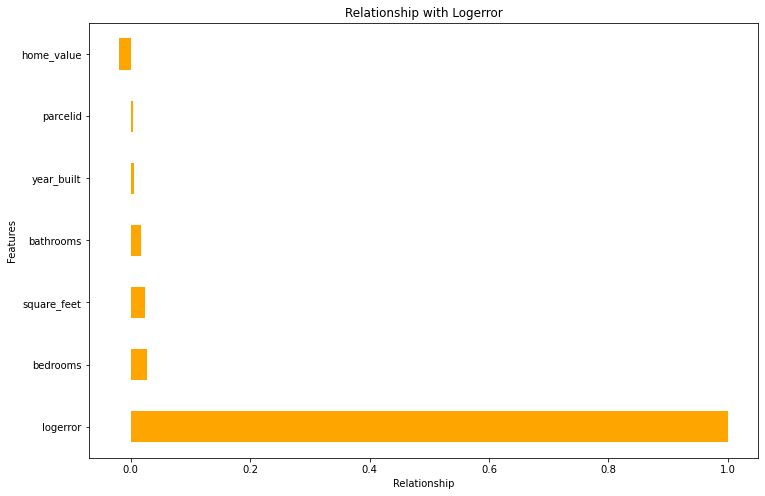

In [10]:
ex.corr_graph(train)

In [11]:
train.corr()

,parcelid,logerror,bathrooms,bedrooms,square_feet,year_built,home_value
parcelid,1.000000,0.003467,0.033093,0.055852,0.051178,0.150658,0.012482
logerror,0.003467,1.000000,0.016717,0.026581,0.024118,0.005457,-0.019432
bathrooms,0.033093,0.016717,1.000000,0.507551,0.710294,0.452170,0.335286
bedrooms,0.055852,0.026581,0.507551,1.000000,0.663142,0.039196,0.156275
square_feet,0.051178,0.024118,0.710294,0.663142,1.000000,0.226297,0.413796
year_built,0.150658,0.005457,0.452170,0.039196,0.226297,1.000000,0.091528
home_value,0.012482,-0.019432,0.335286,0.156275,0.413796,0.091528,1.000000


#### The Questions to be asked when using this altered dataset: 
- Is log error significantly different per number of bathrooms?
- Is log error significantly different per number of bedrooms?
- Is log error significantly different per average sqaure feet in LA vs Orange vs Ventura? 
- Is log error significantly different per age of a home? 
- Is log error significantly different depending on the type of property. 

calculate age

In [12]:
ex.set_home_age(train, validate, test)

### Question 1: Is number of bedrooms linearly correlated with logerror? (Linear corr)

In [13]:
# set alpha = 0.05
alpha = 0.05

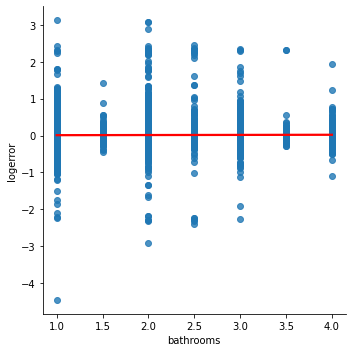

In [14]:
ex.bath_and_logerror(train)

### Statistical Test and Null Hypothesis:
$H_0$: There is no linear correlation between logerror and number of bedrooms


$H_a$: There is a linear correlation between logerror and number of bedrooms

#### I will be performing a pearsons r test to compute statisitcs for relationship.

In [18]:
corr, p = stats.pearsonr(train.bathrooms, train.logerror)

if p < alpha: 
    print('I reject the null hypothesis.')
else:
    print('I fail to reject the null hypothesis.')

I reject the null hypothesis.


#### Takeaways:
- There is some linear correlation between number of bedrooms and logerror.

### Question 2: Is log error significantly different per number of bedrooms?

$H_0$: There is no significant difference between number of bedrooms and logerror.

$H_a$: There is a significant difference between number of bedrooms and logerror.

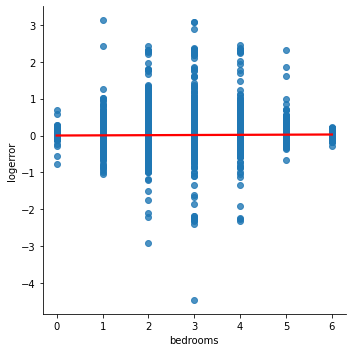

In [19]:
sns.lmplot(x='bedrooms', y='logerror', data=train, line_kws={'color':'red'})
plt.show()

In [20]:
corr, p = stats.pearsonr(train.logerror, train.bedrooms)
corr, p

(0.026580957068251657, 2.7261870784324833e-07)

In [21]:
if p < alpha: 
    print('I reject the null hypothesis that there is no significant difference between number of bedrooms and logerror.')
else:
    print('I fail to reject the null hypothesis.')

I reject the null hypothesis that there is no significant difference between number of bedrooms and logerror.


#### Takeaways:
- There is some linear correlation between number of bathrooms and logerror.

### Question 3: Is there a significant difference between population logerror and logerror in LA vs Orange vs Ventura? 

In [ ]:
la = train[train.county == 'Los Angeles']
orange = train[train.county == 'Orange']
ventura = train[train.county == 'Ventura']

In [ ]:
print(la.logerror.var())
print(train.logerror.var())

There is no equal variance between LA LE and Pop LE so I will be conducting a mannwhiteney test with the alternative set to 'two-sided'

In [ ]:
la.info()

### Los Angeles Logerror and Population Logerror:

$H_0$: There is no significant difference between Los Angeles Logerror and population logerror. 

$H_a$: There is a significant difference between Los Angeles logerror and population logerror.

In [ ]:
alpha = .05
t, p = stats.mannwhitneyu(la.logerror, train.logerror, alternative='two-sided')

if p < alpha:
    print('I reject the null hypothesis that there is no difference.')
else:
    print('I fail to reject the null hypothesis. There is a significant difference.')

#### Takeaway:
- There is a significant difference between Los Angeles Logerror and the population logerror.

### Ventura County Logerror and Population Logerror:

$H_0$: There is no significant difference between Los Angeles Logerror and population logerror. 

$H_a$: There is a significant difference between Los Angeles logerror and population logerror.

In [ ]:
print(ventura.logerror.var())
print(train.logerror.var())

There is a slight difference, nonetheless a difference between the variances. As such, a mannwhiteney test with the alternative = 'two-sided'

In [ ]:
alpha = .05
t, p = stats.mannwhitneyu(ventura.logerror, train.logerror, alternative='two-sided')

if p < alpha:
    print('I reject the null hypothesis that there is no difference.')
else:
    print('I fail to reject the null hypothesis. There is a significant difference.')

#### Takeaway:
- There is a significant difference between Los Angeles Logerror and population logerror.

### Orange County and Population Logerror:

$H_0$: There is no significant difference between Orange County Logerror and population logerror. 

$H_a$: There is a significant difference between Orange County logerror and population logerror

In [ ]:
print(orange.logerror.var())
print(train.logerror.var())

There is a difference in variance, thus not equal. 

In [ ]:
alpha = .05
t, p = stats.mannwhitneyu(orange.logerror, train.logerror, alternative='two-sided')

if p < alpha:
    print('I reject the null hypothesis that there is no difference.')
else:
    print('I fail to reject the null hypothesis. There is a significant difference.')

### Takeaways:
- There is no significant difference, or no difference between Orange County Logerror and the population logerror.

## Question 4: Is log error significantly different per Property Age?  (Is there a linear correlation?)

$H_0$: There is no linear correlation between Property Age and Logerror

$H_a$: There is a linear correlation between property age and logerror

In [ ]:
plt.figure(figsize=(16,8))
sns.lmplot(data=train, x='property_age', y='logerror', line_kws={'color':'red'})
plt.show
plt.title('Correlation between Property Age and Logerror')

In [ ]:
corr, p = stats.pearsonr(train.property_age, train.logerror)
corr, p

In [ ]:
if p < alpha:
    print('I reject the null hypothesis that there is no linear correlation.')
else:
    print('I fail to reject the null hypothesis, there is a linear correlation.')

### Takeaways:
- There is a linear correlation between the age of the property and logerror.

## Question 5: While controlling for property type, is there a linear correlation between the year the home was built and logerror?

$H_0$: There is no significant difference between the type of property and logerror

$H_a$: There is a significant difference between logerror and type of property.

In [ ]:
train.property_type.value_counts()

Mobile homes and townhomes won't be observed as the sample size is too small.

In [ ]:
single_family = train[train.property_type == 'Single Family Residential']
condo = train[train.property_type == 'Condominium']

In [ ]:
types = ['Single Family Residential', 'Condominium']

In [ ]:
condo.info()

### Condominium homes:

In [ ]:
sns.lmplot(data=condo, x='year_built', y='logerror', line_kws={'color':'red'}, 
           hue='county')

In [ ]:
corr, p = stats.pearsonr(condo.year_built, condo.logerror)
corr, p

In [ ]:
if p < alpha:
    print('I reject the null hypothesis that there is no linear correlation.')
else:
    print('I fail to reject the null hypothesis, there is a linear correlation.')

Takeaways:
   - Strong postive linear correlation. P value .96

### Single Family Residentials

In [ ]:
sns.lmplot(data=single_family, x='year_built', y='logerror', line_kws={'color':'red'}, 
           hue='county')

In [ ]:
corr, p = stats.pearsonr(single_family.year_built, single_family.logerror)
corr, p

In [ ]:
if p < alpha:
    print('I reject the null hypothesis that there is no linear correlation.')
else:
    print('I fail to reject the null hypothesis, there is a linear correlation.')

### Takeaways:
- No linear correlation between type single family residential's year built, and logerror.

### Exploration Summary and Key Takeaways:
- When observing general home features such as bedrooms and bathrooms: 
    - There is some linear correlation between number of bedrooms and logerror.
    - There is some linear correlation between number of bathrooms and logerror.

- When controlling for county:
    - There is a significant difference between Los Angeles Logerror and the population logerror.
    - There is a significant difference between Los Angeles Logerror and population logerror.
    - There is no significant difference, or no difference between Orange County Logerror and the population logerror.
- When controlling for property type:
    - Townhomes and Mobile home data sample were too small to perform any meaningful statistical operations.
    - No linear correlation between type single family residential's year built, and logerror.
    - Strong postive linear correlation between the year condiminums were built and logerror. (P value .96)

# Clustering

## Scaling the data

In [ ]:
train_scaled, validate_scaled, test_scaled = wr.scale_data(train, validate, test)

df = train_scaled.copy()
df=df.reset_index()
df.head()

### Cluster 1 : Property size

In [ ]:
X = df[['square_feet', 'bedrooms', 'bathrooms']]


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### Inertia loses momentum around 4 so I will move forward with 4 clusters.

In [ ]:
#Create the KMeans model
kmeans = KMeans(n_clusters = 4)

#Fit the model
kmeans.fit(X)

#Make predictions and assign the values to the original train data set
train['property_size_cluster'] = kmeans.predict(X)

### Cluster 2: Age of property

In [ ]:
X2 = df[['property_age', 'year_built']]

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    pd.Series({k: KMeans(k).fit(X2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### Inertia again loses momentum around 4 so I will move forward with 4 clusters.

In [ ]:
#Create the KMeans model
kmeans = KMeans(n_clusters = 4)

#Fit the model
kmeans.fit(X2)

#Make predictions and assign the values to the original train data set
train['age_cluster'] = kmeans.predict(X2)

#### I will now move on to modeling to obtain and mvp